In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from nilearn import datasets, plotting
from nilearn import maskers, image
import matplotlib.pyplot as plt
import nibabel

Hurst exponent function definition:
    R/S method

In [2]:
from hurst import compute_Hc 

def calculate_hurst(time_series):
    """
    Calculate the Hurst exponent for each voxel in the input 2D array.

    Parameters:
    - time_series: 2D array where each column is a time series of a specific voxel.

    Returns:
    - Array of Hurst exponents for each voxels.
    """

    hurst_exponents=[]
    hurst_constants=[]
    hurst_data=[]
    for column in zip(*time_series):
        H, c, data = compute_Hc(column)
        hurst_exponents.append(H)
        hurst_constants.append(c)
        hurst_data.append(data)

    return hurst_exponents,hurst_constants,hurst_data

Hurst exponent function definition:
    DFA method

Visualising the preprocessed data with the following:
    - atlas : no atlas
    - masking : EPI (Echo Planar Imaging)

In [ ]:
fmri_filename = "preprocessed_dataset/sub-025_ses-base_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"

# initialising a masker without atlas
brain_masker = maskers.NiftiMasker(mask_strategy="epi")

# Apply masker
time_series_epi = brain_masker.fit_transform(fmri_filename,
                                               confounds=None)

print("Dimension of the fMRI signal (x,y,z,timestamps): ", nibabel.load(fmri_filename).shape)
print("Dimension of the EPI time series (timestamps , voxels): ", time_series_epi.shape)

# Plotting time series of a voxel
voxel = 1

plt.figure(figsize=(20,3))
plt.plot(time_series_epi[:, voxel])
plt.title("Timeseriese of a voxel")
plt.xlabel("Time (s)", fontsize = 10)
plt.ylabel("BOLD signal", fontsize= 10)
plt.grid()
plt.show()

# #Hurst component analysis:
# hurst_exponents_epi = calculate_hurst(time_series_epi)

# plt.figure(figsize=(20,3))
# plt.plot(hurst_exponents_epi)
# plt.title('Hurst exponent of every voxels')
# plt.xlabel("Voxels", fontsize = 10)
# plt.ylabel("Hurst exponent", fontsize= 10)
# plt.grid()
# plt.show()

report = brain_masker.generate_report()
report

Visualising the preprocessed data with the following:
    - atlas : msdl (Multi Subject Dictionary Learning)
    - masking : atlas + no confounds

In [ ]:
fmri_filename = "Dataset/sub-01/func/sub-01_task-rest_run-1_bold.nii.gz"
# "preprocessed_dataset/sub-025_ses-base_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
data_dir = "../python_scripts/resources/atlas"

#MSDL atlas:
msdl_atlas = datasets.fetch_atlas_msdl(data_dir=data_dir)

msdl_coords = msdl_atlas.region_coords
n_regions = len(msdl_coords)

print(f'MSDL has {n_regions} ROIs, part of the following networks:{np.unique(msdl_atlas.networks)}.')

# initialising a masker

msdl_masker = maskers.NiftiMapsMasker(
    msdl_atlas.maps, resampling_target="data", detrend=True)


# Apply masker
time_series_msdl = msdl_masker.fit_transform(fmri_filename,confounds=None)

print("Dimension of the fMRI signal (x,y,z,timestamps): ", nibabel.load(fmri_filename).shape)
print("Dimension of the msdl time series (timestamps , voxels): ", time_series_msdl.shape)

# Plotting time series of a voxel
voxel = 38

plt.figure(figsize=(20,3))
plt.plot(time_series_msdl[:, voxel], marker = 'o')
plt.title(f'Timeseriese of {msdl_atlas.networks[voxel]} region')
plt.xlabel("Time (s)", fontsize = 10)
plt.ylabel("BOLD signal", fontsize= 10)
plt.grid()
plt.show()

#Hurst component analysis:
hurst_exponents_msdl,hurst_constants_msdl,hurst_data_msdl = calculate_hurst(time_series_msdl)

plt.figure(figsize=(20,3))
plt.plot(hurst_exponents_msdl, marker = 'o')
plt.title('Hurst exponent of every voxels')
plt.xlabel("Voxels", fontsize = 10)
plt.ylabel("Hurst exponent", fontsize= 10)
plt.grid()
plt.show()

report = msdl_masker.generate_report()
report

check the papers and see where and what step they calculated the hurst component 

preprocessing then postprocessing : check the papers and see what all parameters are necessary in postprocess for hurst component calculation
Check the hurst component values based on fmri data
how many timepoints do they have
sleep epochs : every number is 30 seconds
fmriprep paper: most important
how many timepoints is necessary for hurst component
time interval possiblities hurst component analysis : sampling rate 
what is the shortest time point 
how less datapoints can be considered
check the time series of the raw data

Visualising the preprocessed data with the following:
    - atlas : Harvard Oxford Atlas: 2mm
    - masking : atlas + no confounds

Oxford atlas has 48 ROIs.
Dimension of the fMRI signal (x,y,z,timestamps):  (65, 77, 49, 429)
Dimension of the oxford time series (timestamps , voxels):  (429, 48)


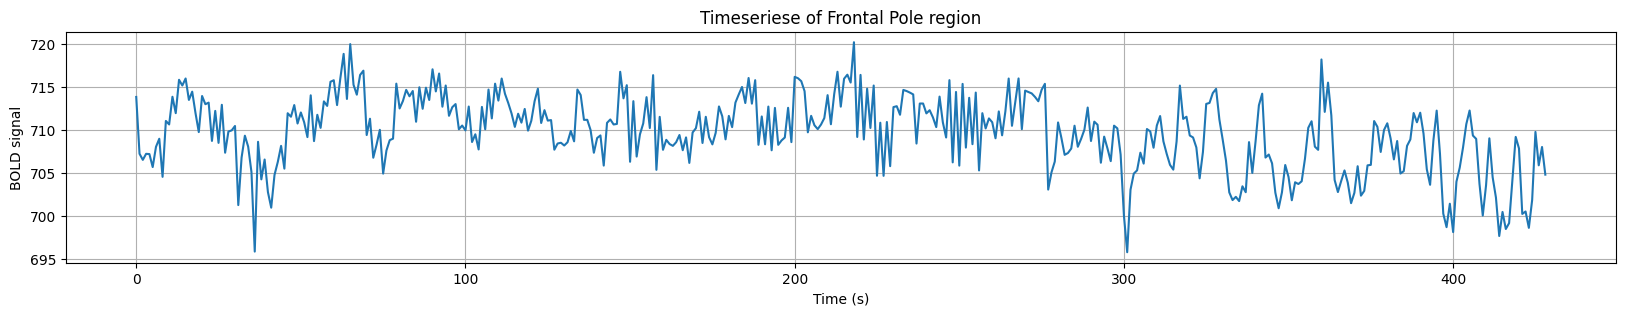

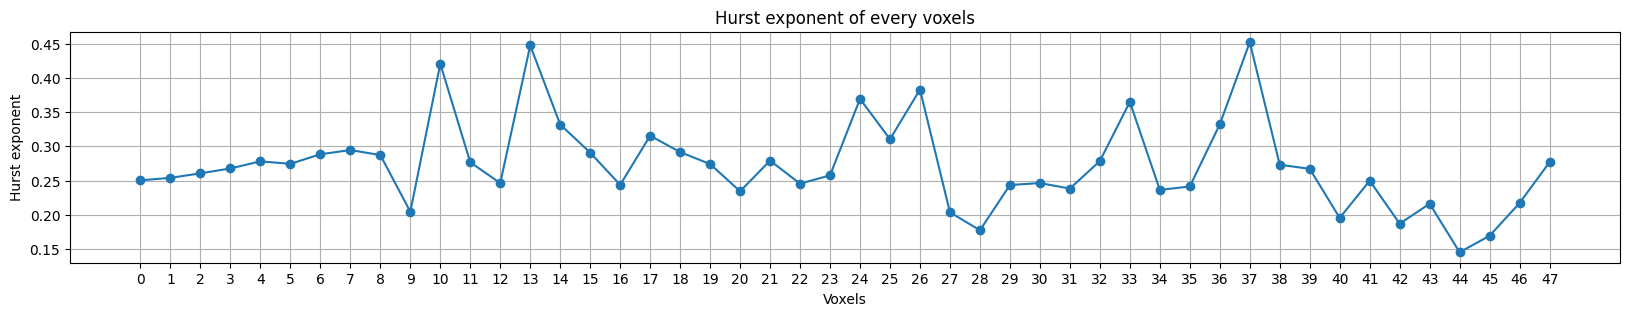

label value,region name,size (in mm^3),relative size (in %)
1,Frontal Pole,123176,11.75
2,Insular Cortex,18728,1.79
3,Superior Frontal Gyrus,40640,3.88
4,Middle Frontal Gyrus,42528,4.06
5,"Inferior Frontal Gyrus, pars triangularis",8824,0.84
6,"Inferior Frontal Gyrus, pars opercularis",11072,1.06
7,Precentral Gyrus,68584,6.54
8,Temporal Pole,37688,3.59
9,"Superior Temporal Gyrus, anterior division",4168,0.4
10,"Superior Temporal Gyrus, posterior division",14640,1.4


In [3]:
fmri_filename = "Dataset/preprocessed/sub-01_task-sleep_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz"
data_dir = "../python_scripts/resources/atlas"

#MSDL atlas:
oxford_atlas = datasets.fetch_atlas_harvard_oxford(atlas_name = "cort-maxprob-thr25-2mm", data_dir=data_dir)

oxford_maps = oxford_atlas.maps
oxford_labels = oxford_atlas.labels
n_regions = len(oxford_labels) - 1 

print(f'Oxford atlas has {n_regions} ROIs.')
# part of the following labels :\n{np.unique(oxford_atlas.labels)}.')

# initialising a masker

oxford_masker = maskers.NiftiLabelsMasker(labels_img=oxford_maps, labels= oxford_labels)

# Apply masker
time_series_oxford = oxford_masker.fit_transform(fmri_filename,confounds=None)

print("Dimension of the fMRI signal (x,y,z,timestamps): ", nibabel.load(fmri_filename).shape)
print("Dimension of the oxford time series (timestamps , voxels): ", time_series_oxford.shape)

# Plotting time series of a voxel
voxel = 1

plt.figure(figsize=(20,3))
plt.plot(time_series_oxford[:, voxel])
plt.title(f'Timeseriese of {oxford_labels[voxel]} region')
plt.xlabel("Time (s)", fontsize = 10)
plt.ylabel("BOLD signal", fontsize= 10)
plt.grid()
plt.show()

#Hurst component analysis:
hurst_exponents_oxford,hurst_constants_oxford,hurst_data_oxford = calculate_hurst(time_series_oxford)

plt.figure(figsize=(20,3))
plt.plot(hurst_exponents_oxford, marker = 'o')
plt.title('Hurst exponent of every regions')
plt.xlabel("Voxels", fontsize = 10)
plt.ylabel("Hurst exponent", fontsize= 10)
# plt.xticks(rotation=90)
plt.xticks(range(0, len(hurst_exponents_oxford))) 
plt.grid()
plt.show()

report = oxford_masker.generate_report()
report

Obtaining the repeatition time for the fmri signals:

In [ ]:
img_preprocessed = image.load_img('preprocessed_dataset/sub-025_ses-base_task-rest_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
img_raw = image.load_img("Dataset/sub-01/func/sub-01_task-rest_run-1_bold.nii.gz")

tr_raw = img_raw.header.get_zooms()[-1]  # Get the TR_raw
print("Repetition Time (TR_raw):", tr_raw)
print(img_raw.header.get_zooms())

tr_preprocessed = img_preprocessed.header.get_zooms()[-1]  # Get the TR_preprocessed
print("Repetition Time (TR_preprocessed):", tr_preprocessed)
print(img_preprocessed.header.get_zooms())

Code to extract all the fmri files from the dataset directory:

In [ ]:
import os
from nilearn import image
import numpy as np

# Directory containing subdirectories named after subjects
main_directory = 'Dataset'

# Get a list of subject directories that start with "sub_"
subject_directories = sorted([d for d in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, d)) and d.startswith("sub-")])

# Initialize lists to store data
fmri_path = []
subject_fmri_path = {}

# Loop through subject directories
for subject_dir in subject_directories:
    fmri_path = []
    subject_path = os.path.join(main_directory, subject_dir)
    func_dir = os.path.join(subject_path, "func")

    if os.path.exists(func_dir) and os.path.isdir(func_dir):
        # Assuming fMRI files have a common pattern, such as '*.nii.gz' inside the "func" subdirectory
        fmri_files = [f for f in os.listdir(func_dir) if f.endswith('.nii.gz')]

        # Loop through fMRI files
        for fmri_file in fmri_files:
            fmri_path.append(os.path.join(func_dir, fmri_file))
        subject_fmri_path[subject_dir]= sorted(np.array(fmri_path))

print(subject_fmri_path)

# tr_raw = []
# for keys in subject_fmri_path:
#     for fmri_data in subject_fmri_path[keys]:
#         img_raw = image.load_img(fmri_data)
#         tr_raw.append(img_raw.header.get_zooms()[-1])
        
# print(tr_raw)

Code to extract number of rest and sleep files of all subjects:

In [ ]:
import os
import pandas as pd

# Function to process a single TSV file
def process_tsv(file_path):
    # Read the TSV file into a DataFrame
    df = pd.read_csv(file_path, sep='\t')

    # Extract subject and run information from the file name
    file_name = os.path.basename(file_path)
    subject = file_name.split('-s')[0]

    # Group by run and calculate max epoch time and NREM states
    grouped_data = df.groupby(['session', 'epoch_start_time_sec']).agg({'30-sec_epoch_sleep_stage': 'max'}).reset_index()
    # Separate sleep runs and rest runs
    sleep_runs = grouped_data[grouped_data['session'].str.contains('sleep_run')]
    rest_runs = grouped_data[grouped_data['session'].str.contains('rest_run')]

    # Calculate max epoch time and associated sleep states for each sleep run
    max_time_and_states_sleep = {}
    for run in sleep_runs['session'].unique():
        run_data = sleep_runs[sleep_runs['session'] == run]
        max_epoch_time = run_data['epoch_start_time_sec'].max()
        sleep_states = run_data.sort_values('epoch_start_time_sec')['30-sec_epoch_sleep_stage'].tolist()
        max_time_and_states_sleep[run] = {'max_epoch_time': max_epoch_time, 'sleep_states': sleep_states}

    # Calculate max epoch time and associated sleep states for each rest run
    max_time_and_states_rest = {}
    for run in rest_runs['session'].unique():
        run_data = rest_runs[rest_runs['session'] == run]
        max_epoch_time = run_data['epoch_start_time_sec'].max()
        sleep_states = run_data.sort_values('epoch_start_time_sec')['30-sec_epoch_sleep_stage'].tolist()
        max_time_and_states_rest[run] = {'max_epoch_time': max_epoch_time, 'sleep_states': sleep_states}

    return subject, max_time_and_states_sleep, max_time_and_states_rest

# Function to process all TSV files in a directory
def process_directory(directory_path):
    source_data = {}

    # Loop through all files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.tsv'):
            file_path = os.path.join(directory_path, file_name)

            subject, max_time_and_states_sleep, max_time_and_states_rest = process_tsv(file_path)

            # Create or update the dictionary
            if subject not in source_data:
                source_data[subject] = {}
            source_data[subject]['max_time_and_states_sleep'] = max_time_and_states_sleep
            source_data[subject]['max_time_and_states_rest'] = max_time_and_states_rest

    return source_data

def save_to_csv(data, output_file):
    df = pd.DataFrame(data)
    df.to_csv(output_file, index=False)

directory_path = 'Dataset/sourcedata'
result = process_directory(directory_path)

save_to_csv(result, 'Dataset/source_data_summary.csv')


Script to analyse the number of rest and sleep runs vs subjects.

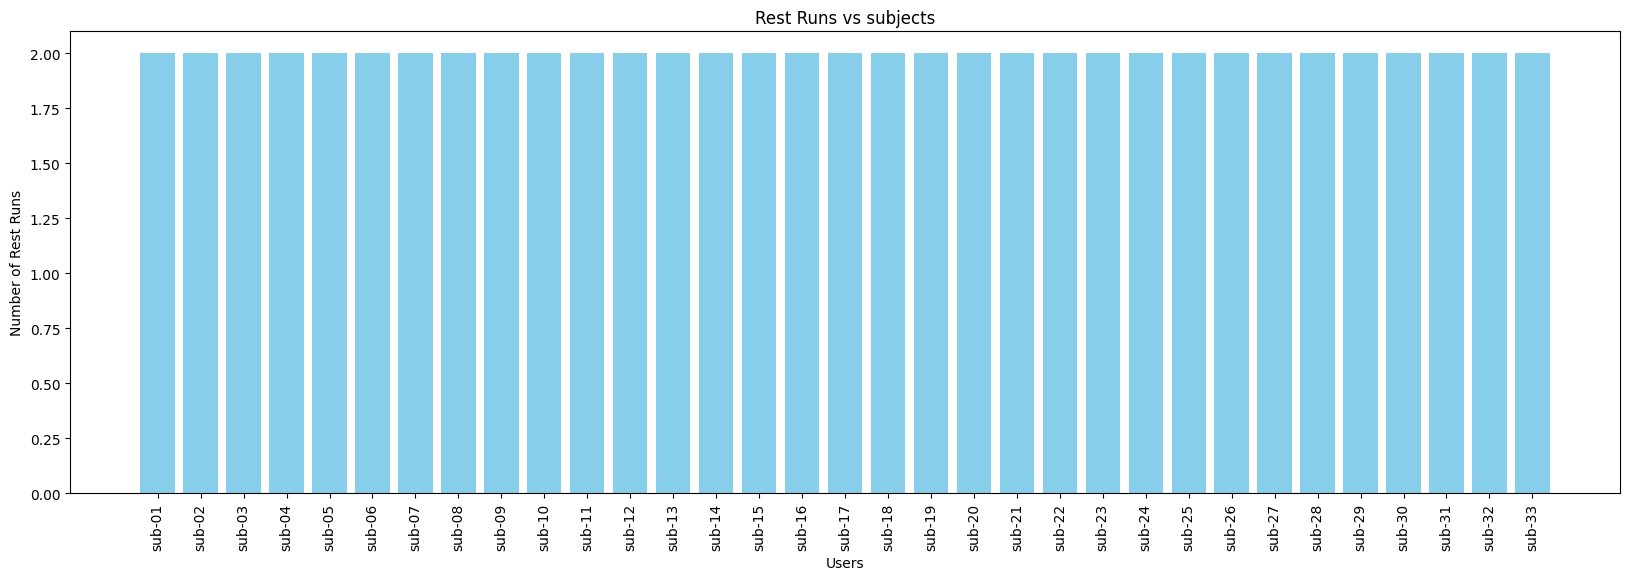

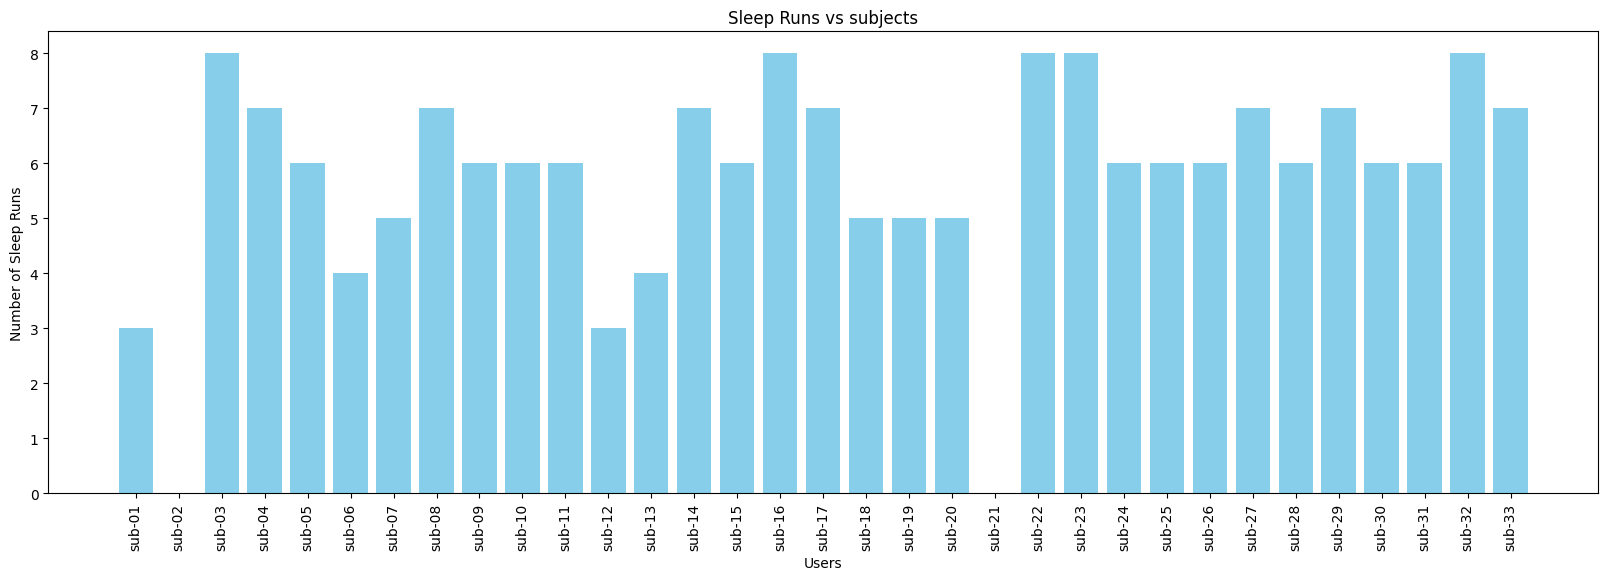


Number of subjects with the same number of Rest Runs:
2 Rest Runs: 33 subjects - ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24', 'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32', 'sub-33']

Number of subjects with the same number of Sleep Runs:
0 Sleep Runs: 2 subjects - ['sub-02', 'sub-21']
3 Sleep Runs: 2 subjects - ['sub-01', 'sub-12']
4 Sleep Runs: 2 subjects - ['sub-06', 'sub-13']
5 Sleep Runs: 4 subjects - ['sub-07', 'sub-18', 'sub-19', 'sub-20']
6 Sleep Runs: 11 subjects - ['sub-05', 'sub-09', 'sub-10', 'sub-11', 'sub-15', 'sub-24', 'sub-25', 'sub-26', 'sub-28', 'sub-30', 'sub-31']
7 Sleep Runs: 7 subjects - ['sub-04', 'sub-08', 'sub-14', 'sub-17', 'sub-27', 'sub-29', 'sub-33']
8 Sleep Runs: 5 subjects - ['sub-03', 'sub-16', 'sub-22', 'sub-23', 'sub-32']


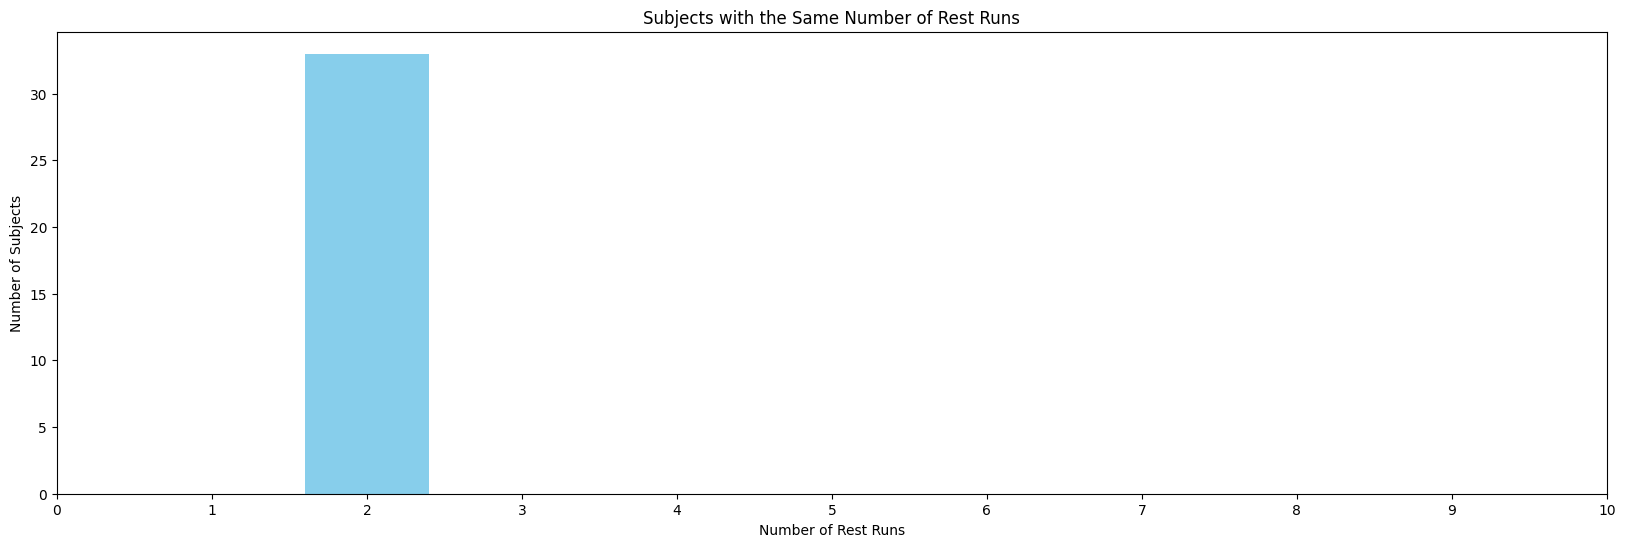

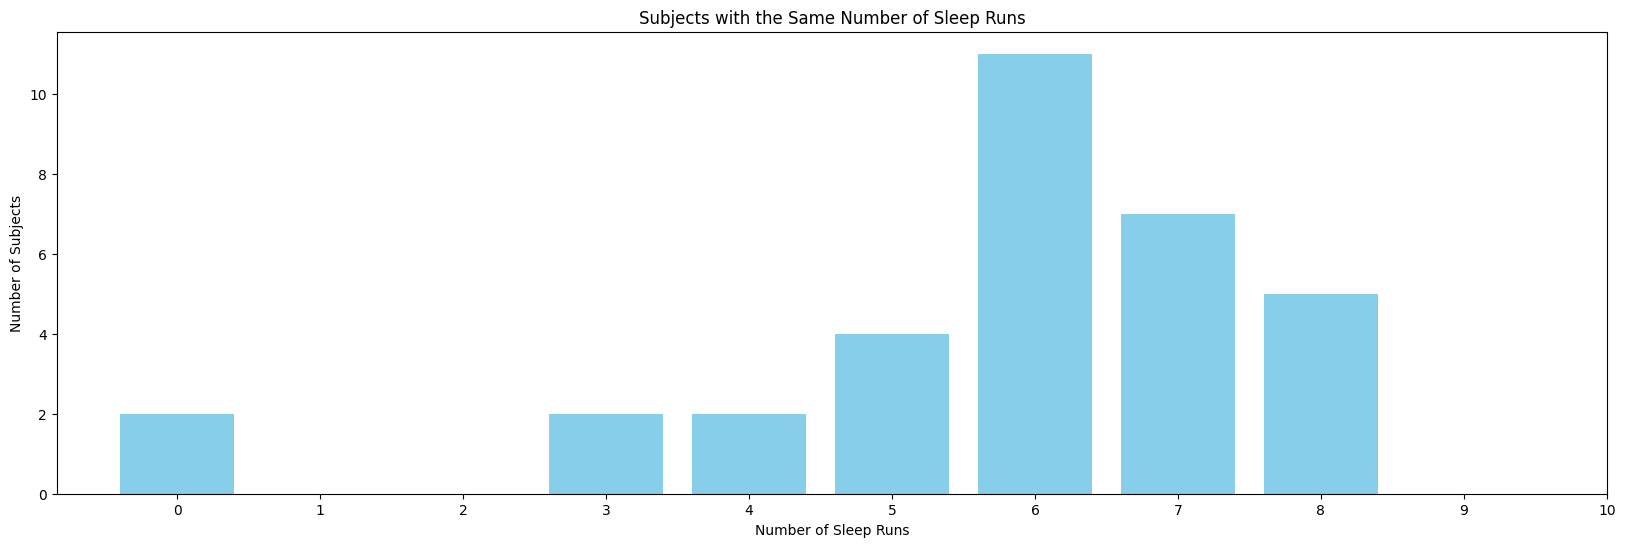

In [62]:
import matplotlib.pyplot as plt
import numpy as np 


def analyze_runs(data):
    # Count the number of rest and sleep runs per user
    rest_runs_count = {}
    sleep_runs_count = {}

    for user, user_data in data.items():
        rest_runs_count[user] = len(user_data.get('max_time_and_states_rest', {}))
        sleep_runs_count[user] = len(user_data.get('max_time_and_states_sleep', {}))

    # Plot bar graphs
    plot_bar_graph(rest_runs_count, 'Rest Runs vs subjects', 'Number of Rest Runs')
    plot_bar_graph(sleep_runs_count, 'Sleep Runs vs subjects', 'Number of Sleep Runs')

    # Count the number of subjects with the same number of rest and sleep runs
    count_dict_rest = count_subjects_same_runs(rest_runs_count, 'Rest Runs')
    count_dict_sleep = count_subjects_same_runs(sleep_runs_count, 'Sleep Runs')

    # Plot bar graphs for subjects with the same number of rest and sleep runs
    plot_count_subjects_bar_graph(count_dict_rest, 'Rest Runs')
    plot_count_subjects_bar_graph(count_dict_sleep, 'Sleep Runs')

def plot_bar_graph(data, title, ylabel):
    users = list(data.keys())
    counts = list(data.values())
    plt.figure(figsize=(20,6))
    plt.bar(users, counts, color='skyblue')
    plt.xlabel('Users')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

def count_subjects_same_runs(data, run_type):
    count_dict = {}
    for count in set(data.values()):
        subjects_with_count = [subject for subject, count_subject in data.items() if count_subject == count]
        count_dict[count] = subjects_with_count

    print(f"\nNumber of subjects with the same number of {run_type}:")
    for count, subjects in count_dict.items():
        print(f"{count} {run_type}: {len(subjects)} subjects - {subjects}")

    return count_dict

def plot_count_subjects_bar_graph(count_dict, run_type):
    counts = list(count_dict.keys())
    subjects_count = [len(subjects) for subjects in count_dict.values()]

    x_ticks = np.arange(0,11,1) 
    plt.figure(figsize=(20,6))
    plt.bar(counts, subjects_count, color='skyblue')
    plt.xlabel(f'Number of {run_type}')
    plt.ylabel('Number of Subjects')
    plt.title(f'Subjects with the Same Number of {run_type}')
    plt.xticks(x_ticks)
    plt.show()

analyze_runs(result)


Comparing epochs time of each subjects:

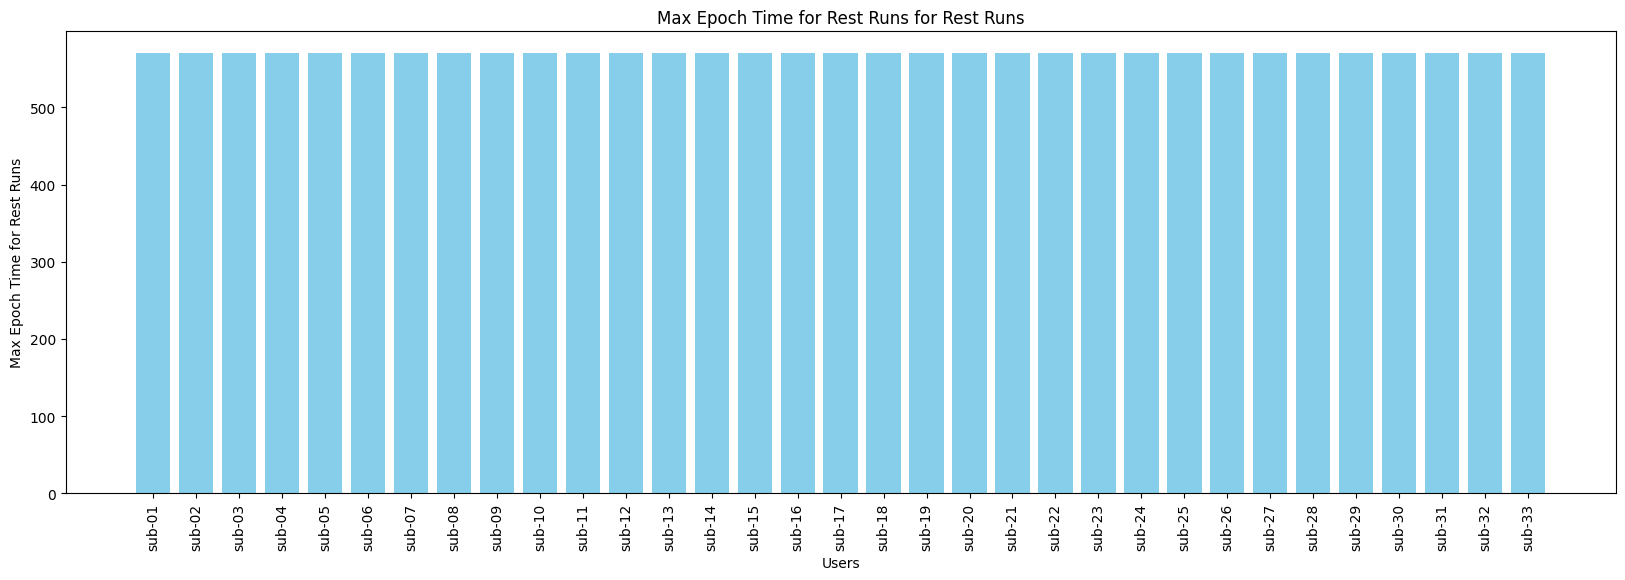

/Users/pranayjain/miniconda3/envs/nilearn/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/pranayjain/miniconda3/envs/nilearn/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


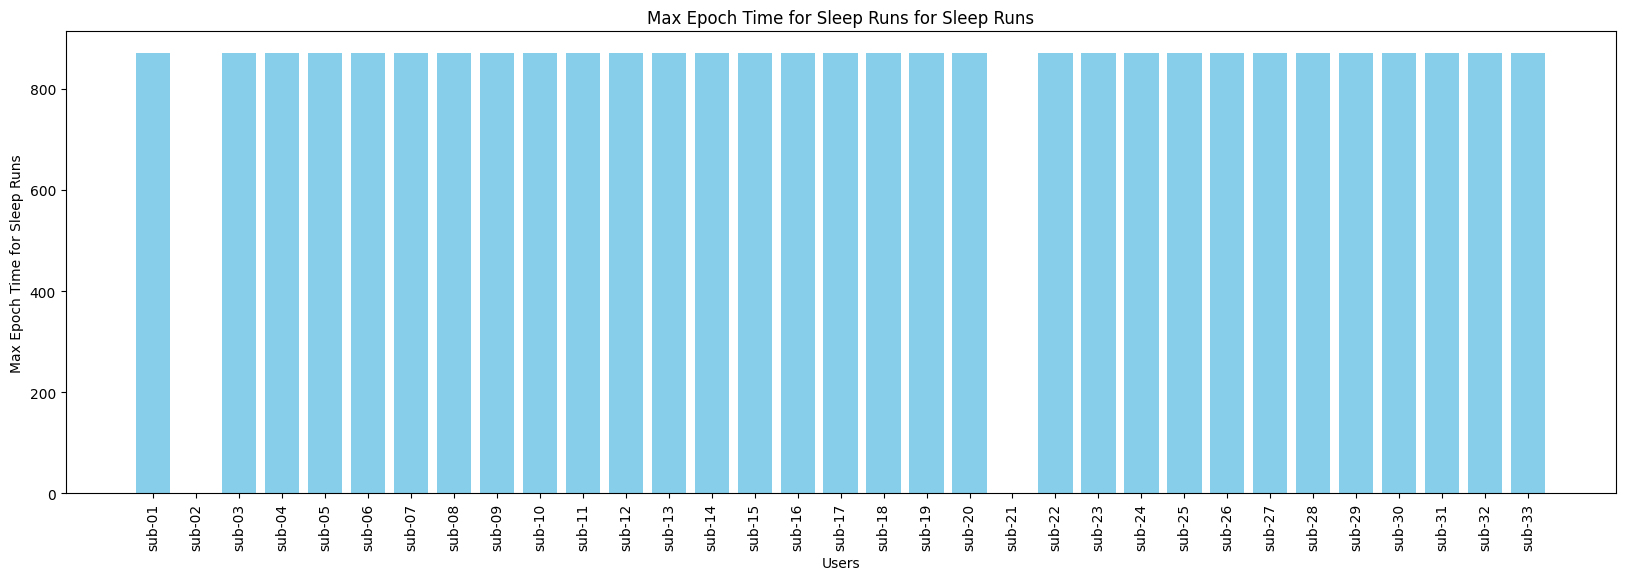


Subjects with the same max epoch time for Rest Runs:
Max Epoch Time Rest Runs: 570, Total Subjects: 33

Subjects with the same max epoch time for Sleep Runs:
Max Epoch Time Sleep Runs: 870.0, Total Subjects: 31


In [63]:
import matplotlib.pyplot as plt
import numpy as np

def analyze_runs(data):
    # Extract max epoch time for each rest and sleep run
    max_epoch_time_rest = {}
    max_epoch_time_sleep = {}
    
    for user, user_data in data.items():
        max_epoch_time_rest[user] = [run_data['max_epoch_time'] for run_data in user_data.get('max_time_and_states_rest', {}).values()]
        max_epoch_time_sleep[user] = [run_data['max_epoch_time'] for run_data in user_data.get('max_time_and_states_sleep', {}).values()]
    
    # Plot bar graphs for max epoch time for rest and sleep runs
    plot_max_epoch_time_bar_graph(max_epoch_time_rest, 'Rest Runs', 'Max Epoch Time for Rest Runs')
    plot_max_epoch_time_bar_graph(max_epoch_time_sleep, 'Sleep Runs', 'Max Epoch Time for Sleep Runs')

    # Identify subjects with the same max epoch time for rest and sleep runs
    count_subjects_same_max_time(max_epoch_time_rest, 'Rest Runs')
    count_subjects_same_max_time(max_epoch_time_sleep, 'Sleep Runs')

def plot_max_epoch_time_bar_graph(data, run_type, ylabel):
    users = list(data.keys())
    max_epoch_times = [np.mean(max_times) for max_times in data.values()]
    
    plt.figure(figsize=(20,6))
    plt.bar(users, max_epoch_times, color='skyblue')
    plt.xlabel('Users')
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.title(f'{ylabel} for {run_type}')
    plt.show()

def count_subjects_same_max_time(data, run_type):
    count_dict = {}
    for max_time in set(np.concatenate(list(data.values()))):
        subjects_with_max_time = [user for user, max_times in data.items() if max_time in max_times]
        count_dict[max_time] = subjects_with_max_time

    print(f"\nSubjects with the same max epoch time for {run_type}:")
    for max_time, subjects in count_dict.items():
        print(f"Max Epoch Time {run_type}: {max_time}, Total Subjects: {len(subjects)}")

# Assuming you already have the 'result' dictionary
analyze_runs(result)


In [ ]:
# nrem_status_rest = {}
# nrem_status_sleep = {}
# print(result)
# for user,user_data in result.items():
#     nrem_status_rest[user] = [run_data['sleep_states'] for run_data in user_data.get('max_time_and_states_rest', {}).values()]
#     nrem_status_sleep[user] = [run_data['sleep_states'] for run_data in user_data.get('max_time_and_states_sleep', {}).values()]